#### GISC 420 T1 2022
# Geometric transformations

In [1]:
# You need to run this cell to get things setup
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas

# Load the data
pts = geopandas.read_file("pts.geojson")
lines = geopandas.read_file("ways.geojson")
bldgs = geopandas.read_file("buildings.geojson")

Because the `shapely` library on which the `geopandas` geometry operations are based is concerned with geometry on a flat 2D surface and knows nothing about projections, we can make use of a number of simple geometric transformations. It is probably most useful to think of these as editing tools.

<AxesSubplot:title={'center':'Shifted 50m north and 50m east'}>

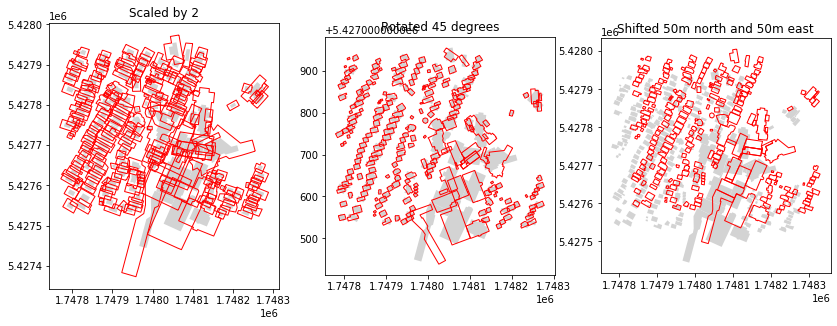

In [2]:
fig = pyplot.figure(figsize=(14,5))

ax1 = fig.add_subplot(131)
ax1.set_title("Scaled by 2")
bldgs.plot(ax=ax1, facecolor='lightgrey')
bldgs.scale(2, 2).plot(ax=ax1, facecolor='None', edgecolor='r')

ax2 = fig.add_subplot(132)
ax2.set_title("Rotated 45 degrees")
bldgs.plot(ax=ax2, facecolor='lightgrey')
bldgs.rotate(45).plot(ax=ax2, facecolor='None', edgecolor='r')

ax3 = fig.add_subplot(133)
ax3.set_title("Shifted 50m north and 50m east")
bldgs.plot(ax=ax3, facecolor='lightgrey')
bldgs.translate(50, 50).plot(ax=ax3, facecolor='None', edgecolor='r')

For many of these operations, if you want to apply different operations to individual elements, things are trickier, because we have to work with individual shapely geometry objects one by one using the functions in `shapely.affinity`. Here's an example, so you can see how this works.

<AxesSubplot:title={'center':'Higgledy piggledy random rotations'}>

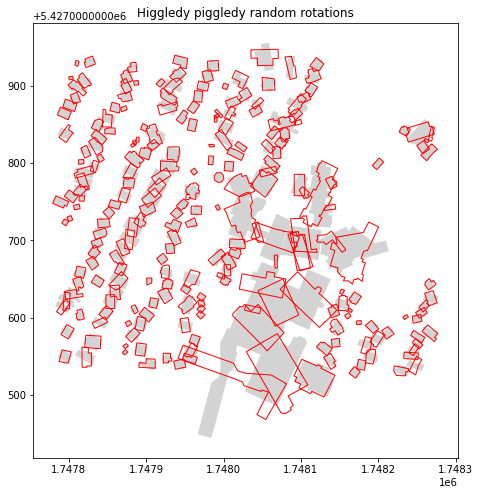

In [3]:
# we need the random module to generate random rotations
# and the shapely.affinity module to apply the rotate function
# to individual geometry object. So... import them
import random
import shapely.affinity

# make an empty list to put the results in
bldgs_rotated = []
# now go through the individual geometries in a loop
# applying a different transformation to each one
for b in bldgs.geometry:
    bldgs_rotated.append(shapely.affinity.rotate(b, random.random() * 360))

# make the resulting list into a GeoSeries
bldgs_rotated = geopandas.GeoSeries(bldgs_rotated)
    
# And now plot them    
fig = pyplot.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title("Higgledy piggledy random rotations")
bldgs.plot(ax=ax, facecolor='lightgrey')
bldgs_rotated.plot(ax=ax, facecolor='None', edgecolor='r')

If you wanted to buffer a set of objects to different distances depending for example, on building type or some other factor, then you would have to deploy an approach similar to this.